## Part 1: Importing Data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random as rnd


In [ ]:
filename = "/content/data.csv"
disaster = pd.read_csv(filename, header = 0)

## Part 2: Exploring the Dataset

##### How large is the dataset?
##### What are the features of the dataset? Are they numerical or categorical? 
##### What are the missing values?


In [ ]:
# to get a preliminary idea of the data
disaster.head()

,Unnamed: 0,Id,class,num_sibling/spouse,num_parent/child,ticket,price,Seat,departure_from,gender,alive,age
0,0,1,3,1,0,CUGSP1ULC1,7.2500,NaN,S,male,0,22.0
1,1,2,1,1,0,RWKPI7Y5RI,71.2833,C85,C,female,1,38.0
2,2,3,3,0,0,DTHA121ED6,7.9250,NaN,S,female,1,26.0
3,3,4,1,1,0,B46YX3C4TM,53.1000,C123,S,female,1,35.0
4,4,5,3,0,0,YJKMT1KA7C,8.0500,NaN,S,male,0,35.0


In [ ]:
# to understand the size of the dataset
disaster.count() #866 rows

Unnamed: 0            866
Id                    866
class                 866
num_sibling/spouse    866
num_parent/child      866
ticket                866
price                 866
Seat                  198
departure_from        864
gender                866
alive                 866
age                   692
dtype: int64

In [ ]:
# explore which features contain missing values
disaster.isnull().sum()

Unnamed: 0              0
Id                      0
class                   0
num_sibling/spouse      0
num_parent/child        0
ticket                  0
price                   0
Seat                  668
departure_from          2
gender                  0
alive                   0
age                   174
dtype: int64

Correlation HeatMap - To understand the correlation between the features


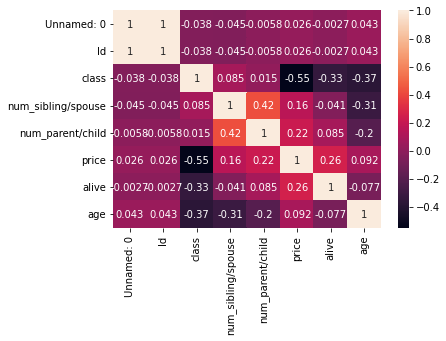

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

# creating correlation matrix
corr_matrix = disaster.corr()

# visualising it
sn.heatmap(corr_matrix, annot = True)
plt.show()


## Part 3: Data Cleaning

##### Code for data cleaning adapted from https://www.kaggle.com/code/startupsci/titanic-data-science-solutions


##### After exploring the dataset, we decided to drop the "Seat" feature as it has too many missing values which cannot be predicted by a trend. We also dropped the unnamed first column, the id column and the ticket column as they are not useful to our analysis. 

In [ ]:
disaster.drop('Seat',axis =1, inplace = True)
disaster.isnull().sum() # check that we have dropped the "Seat" feature

Unnamed: 0              0
Id                      0
class                   0
num_sibling/spouse      0
num_parent/child        0
ticket                  0
price                   0
departure_from          2
gender                  0
alive                   0
age                   174
dtype: int64

##### We also dropped the 'price' column as there is double weightage on class/price of ticket.


In [ ]:
disaster.drop('Unnamed: 0',axis =1, inplace = True)
disaster.drop('Id',axis =1, inplace = True)
disaster.drop('ticket',axis =1, inplace = True)

disaster.drop('price',axis =1, inplace = True) # rationale for dropping price - not independent with the 'class'

##### We observed that "departure_from" and "age" features also have missing values. However, we hypothesised that these features are essential to our analysis. Thus, we cleaned the data and filled in the missing values for these features via prediction based on the existing values.

In [ ]:
# fill in the missing values for "departure_from"
freqDeparture = disaster.departure_from.dropna().mode()[0] # take the mode of the existing values
disaster['departure_from'] = disaster['departure_from'].fillna(freqDeparture) # fill in the two missing values with the mode


In [ ]:
# fill in the missing values for "age"

age_mean = disaster.age.dropna().mean() # calculate the mean of the existing values
age_SD = disaster.age.dropna().std() # calculate the standard deviation of the existing values
# loop through all the missing values, from exploring the data, we observed that there were 174 missing values for "age"
# at each missing value, generate a random integer between the mean and standard deviation
# fill in this missing value with the integer generated
for i in range(174):
  random_age = rnd.randint(round(age_mean-age_SD),round(age_mean+age_SD))
  disaster['age'] = disaster['age'].fillna(random_age, limit=1)

In [ ]:
# check that the "age" feature has been cleaned correctly with the missing values filled in 
disaster.age.value_counts()

18.0    35
30.0    34
28.0    32
22.0    31
24.0    31
        ..
20.5     1
14.5     1
70.5     1
55.5     1
74.0     1
Name: age, Length: 88, dtype: int64

##### We converted the categorical features (gender and departure_from) into numerical values.

In [ ]:
# deal with the categorical features 
disaster['gender'] = disaster['gender'].map({'female':1, 'male': 0}).astype(int)
disaster['departure_from'] = disaster['departure_from'].map({'Q': 2, 'C':1, 'S': 0}).astype(int)

## Part 4: Splitting the dataset



##### From exploring the data, we identify that we want to predict whether an individual survives or not based on their other features (such as gender, age, class etc.). Thus, we will split our dataset into our X (all features apart from "alive") and our y ("alive"). y can take on values of either 0 or 1. 

In [ ]:
xvals = disaster.drop("alive", axis = 1)
yvals = disaster["alive"]
xvals.shape, yvals.shape

((866, 6), (866,))

In [ ]:
# split the dataset into training set and testing set using train-and-test split method 
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split(xvals, yvals, test_size = 0.2, random_state = 0)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((692, 6), (174, 6), (692,), (174,))

In [ ]:
# standardizing the training and testing data
from sklearn.preprocessing import StandardScaler
std_x = StandardScaler()
xtrain = std_x.fit_transform(xtrain)
xtest = std_x.transform(xtest)

## Part 5: Training the model and Predicting

### Part 5.1: Logistic Regression 

In [ ]:
# using Logistic regression from sklearn library 
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression()

# fit the parameter to get the parameters
model_log.fit(xtrain, ytrain)

# output predicted by classifier for xtest data
y_pred_lr = model_log.predict(xtest)

In [ ]:
# calculate accuracy of model 
from sklearn.metrics import accuracy_score 
accuracy_log = accuracy_score(ytest, y_pred_lr)
print("Accuracy for Logistic Regression: ", round(accuracy_log*100,2))

Accuracy for Logistic Regression:  80.46


##### Code for k-fold cross validation adapted from https://www.kaggle.com/code/vinothan/titanic-model-with-90-accuracy

In [ ]:
# k-fold cross validation 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict 
kfold = KFold(n_splits = 5, random_state = 0, shuffle = True) # k=5, split the data into 5 equal parts
score_lr = cross_val_score(model_log, xvals, yvals, scoring='accuracy')
print('Cross validated score for Logistic Regression:', round(score_lr.mean()*100,2))
y_pred = cross_val_predict(model_log, xvals, yvals)

Cross validated score for Logistic Regression: 78.41


In [ ]:
# confusion matrix 
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(ytest, y_pred_lr)

print("Confusion Matrix: \n", cm_lr)

Confusion Matrix: 
 [[87 17]
 [17 53]]


In [ ]:
# classification report 
from sklearn.metrics import classification_report
target_names = ['not alive', 'alive']
cr_lr = classification_report(ytest, y_pred_lr, target_names=target_names)

print("Classification Report: \n", cr_lr)

Classification Report: 
               precision    recall  f1-score   support

   not alive       0.84      0.84      0.84       104
       alive       0.76      0.76      0.76        70

    accuracy                           0.80       174
   macro avg       0.80      0.80      0.80       174
weighted avg       0.80      0.80      0.80       174




### Part 5.2: KNN Classifier

##### Code for find best k-value algorithm adapted from https://medium.com/geekculture/applying-7-classification-algorithms-on-the-titanic-dataset-278ef222b53c

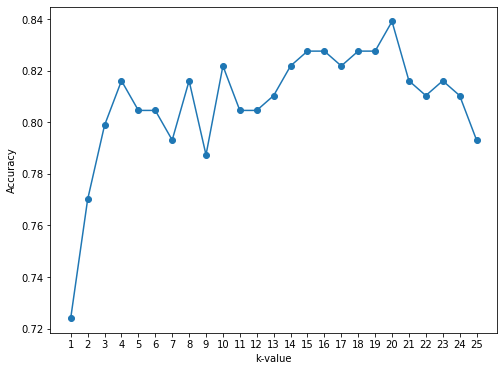

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score 

# choosing the k-value
acc = []

# loop through k-values from 1 to 25 and test their accuracy
# we will choose the k-value that gives us the best accuracy 
for i in range(1,26):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(xtrain, ytrain)
  y_pred = knn.predict(xtest)
  acc.append(accuracy_score(ytest, y_pred))

highest_acc = max(acc)
best_k = acc.index(highest_acc) + 1

# visualise which is the best k-value by plotting a line graph
plt.figure(figsize=(8,6))
plt.plot(range(1,26),acc, marker = "o")
plt.xlabel("k-value")
plt.ylabel("Accuracy")
plt.xticks(range(1,26))
plt.show()

By running the above, we can determine the best k-value each time, updating this value constantly. We will then use this best k-value generated to fit our knn model. 

In [ ]:
# fit the model with training data
knn = KNeighborsClassifier(n_neighbors = best_k)
knn.fit(xtrain, ytrain)

# output predicted by classifier for xtest data
y_pred_knn = knn.predict(xtest)

In [ ]:
# calculate accuracy of model
accuracy_knn = accuracy_score(ytest, y_pred_knn)
print("Accuracy for KNN: ", round(accuracy_knn*100,2))

Accuracy for KNN:  83.91


In [ ]:
# k-fold cross validation 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict 
kfold = KFold(n_splits = 5, random_state = 0, shuffle = True) # k=5, split the data into 5 equal parts
score_knn = cross_val_score(knn, xvals, yvals, scoring='accuracy')
print('Cross validated score for KNN:', round(score_knn.mean()*100,2))
y_pred = cross_val_predict(knn, xvals, yvals)

Cross validated score for KNN: 72.29


In [ ]:
# confusion matrix 
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(ytest, y_pred_knn)

print("Confusion Matrix: \n", cm_knn)

Confusion Matrix: 
 [[94 10]
 [18 52]]


In [ ]:
# classification report 
from sklearn.metrics import classification_report
target_names = ['not alive', 'alive']
cr_knn = classification_report(ytest, y_pred_knn, target_names=target_names)

print("Classification Report: \n", cr_knn)

Classification Report: 
               precision    recall  f1-score   support

   not alive       0.84      0.90      0.87       104
       alive       0.84      0.74      0.79        70

    accuracy                           0.84       174
   macro avg       0.84      0.82      0.83       174
weighted avg       0.84      0.84      0.84       174



### Part 5.3: Decision Trees

In [ ]:
from io import StringIO
import pydotplus
from sklearn import tree
from PIL import Image 


clf_entropy = tree.DecisionTreeClassifier(criterion='entropy', random_state = 19)
clf_entropy.fit(xtrain, ytrain)
clf_entropy.score(xtest,ytest)

out = StringIO()
tree.export_graphviz(clf_entropy, out_file = out)
#image = pydotplus.graph_from_dot_data(out.getvalue())
#image.write_png('titanic4.png')
#img = Image.open('titanic4.png')
#img.show()
#disaster.head()
y_pred_dtree = clf_entropy.predict(xtest)
accuracy_dtree = accuracy_score(y_pred_dtree,ytest)
print("Accuracy for Decision Tree: ", round(accuracy_dtree*100,2))


Accuracy for Decision Tree:  75.86


In [ ]:
# k-fold cross validation 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict 
kfold = KFold(n_splits = 5) # k=5, split the data into 5 equal parts
score_tree = cross_val_score(clf_entropy, xvals, yvals, scoring='accuracy')
print('Cross validated score for Decision Tree:', round(score_tree.mean()*100,2))
y_pred = cross_val_predict(clf_entropy, xvals, yvals)

Cross validated score for Decision Tree: 78.07


In [ ]:
# confusion matrix 
from sklearn.metrics import confusion_matrix
cm_dtree = confusion_matrix(ytest, y_pred_dtree)

print("Confusion Matrix: \n", cm_dtree)

Confusion Matrix: 
 [[83 21]
 [21 49]]


In [ ]:
# classification report 
from sklearn.metrics import classification_report
target_names = ['not alive', 'alive']
cr_dtree = classification_report(ytest, y_pred_dtree, target_names=target_names)

print("Classification Report: \n", cr_dtree)

Classification Report: 
               precision    recall  f1-score   support

   not alive       0.80      0.80      0.80       104
       alive       0.70      0.70      0.70        70

    accuracy                           0.76       174
   macro avg       0.75      0.75      0.75       174
weighted avg       0.76      0.76      0.76       174



### Part 5.4: Neutral Networks

##### Code adapted from https://www.kaggle.com/code/theblackmamba31/titanic-tutorial-neural-network

In [ ]:
# Importing the Keras main module forcing tensorflow 1.x backend
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Input, Dropout

In [ ]:
model = Sequential()

model.add(Input(shape = (6,))) 
model.add(Dense(32, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.1)) # we will apply Dropout for regularization to fight over-fitting
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.15))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 32)                224       
                                                                 
 dense_25 (Dense)            (None, 64)                2112      
                                                                 
 dense_26 (Dense)            (None, 128)               8320      
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_27 (Dense)            (None, 64)                8256      
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_28 (Dense)            (None, 32)               

In [ ]:
opt = tf.optimizers.SGD(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

epochs = 50
batch_size = 32
history = model.fit(xtrain, ytrain, batch_size = batch_size, verbose = 2, epochs = epochs, validation_data = (xtest, ytest))

Epoch 1/50
22/22 - 1s - loss: 0.6957 - accuracy: 0.4422 - val_loss: 0.6888 - val_accuracy: 0.5690 - 759ms/epoch - 34ms/step
Epoch 2/50
22/22 - 0s - loss: 0.6863 - accuracy: 0.6040 - val_loss: 0.6841 - val_accuracy: 0.5977 - 93ms/epoch - 4ms/step
Epoch 3/50
22/22 - 0s - loss: 0.6810 - accuracy: 0.6185 - val_loss: 0.6788 - val_accuracy: 0.5977 - 54ms/epoch - 2ms/step
Epoch 4/50
22/22 - 0s - loss: 0.6744 - accuracy: 0.6199 - val_loss: 0.6747 - val_accuracy: 0.5977 - 57ms/epoch - 3ms/step
Epoch 5/50
22/22 - 0s - loss: 0.6677 - accuracy: 0.6185 - val_loss: 0.6710 - val_accuracy: 0.5977 - 56ms/epoch - 3ms/step
Epoch 6/50
22/22 - 0s - loss: 0.6646 - accuracy: 0.6199 - val_loss: 0.6673 - val_accuracy: 0.5977 - 57ms/epoch - 3ms/step
Epoch 7/50
22/22 - 0s - loss: 0.6596 - accuracy: 0.6199 - val_loss: 0.6637 - val_accuracy: 0.5977 - 78ms/epoch - 4ms/step
Epoch 8/50
22/22 - 0s - loss: 0.6551 - accuracy: 0.6199 - val_loss: 0.6598 - val_accuracy: 0.5977 - 57ms/epoch - 3ms/step
Epoch 9/50
22/22 - 0s 

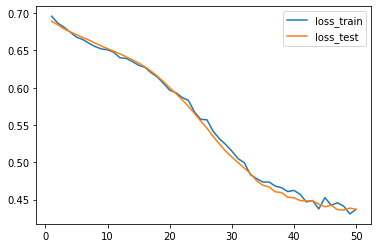

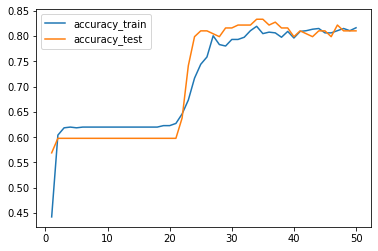

In [ ]:
# History for loss

loss_train = history.history['loss']
loss_test = history.history['val_loss']
loss_train_curve = plt.plot(np.arange(1,51,1), loss_train, label = 'loss_train')
loss_test_curve = plt.plot(np.arange(1,51,1), loss_test, label = 'loss_test')

plt.legend()

plt.show()

# History for accuracy

accuracy_train = history.history['accuracy']
accuracy_test = history.history['val_accuracy']
accuracy_train_curve = plt.plot(np.arange(1,51,1), accuracy_train, label = 'accuracy_train')
accuracy_test_curve = plt.plot(np.arange(1,51,1), accuracy_test, label = 'accuracy_test')

plt.legend()

plt.show()

In [ ]:
y_pred_nn = model.predict(xtest)
# since sigmoid activation function in output layer 
y_pred_nn = (y_pred_nn > 0.5).astype(int)

6/6 [==============================] - 0s 2ms/step


In [ ]:
from sklearn import metrics

accuracy_nn = metrics.accuracy_score(ytest, y_pred_nn)
print("Accuracy for NN: ", round(accuracy_nn*100,2))

Accuracy for NN:  81.03


In [ ]:
# confusion matrix 
from sklearn.metrics import confusion_matrix
cm_nn = confusion_matrix(ytest, y_pred_nn)

print("Confusion Matrix: \n", cm_nn)

Confusion Matrix: 
 [[91 13]
 [20 50]]


In [ ]:
# classification report 
from sklearn.metrics import classification_report
target_names = ['not alive', 'alive']
cr_nn = classification_report(ytest, y_pred_nn, target_names=target_names)

print("Classification Report: \n", cr_nn)

Classification Report: 
               precision    recall  f1-score   support

   not alive       0.82      0.88      0.85       104
       alive       0.79      0.71      0.75        70

    accuracy                           0.81       174
   macro avg       0.81      0.79      0.80       174
weighted avg       0.81      0.81      0.81       174



## Part 6: Model evaluation

###### Code adapted from https://www.kaggle.com/code/vinothan/titanic-model-with-90-accuracy


In [ ]:
# comparison of each model by their accuracy
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree' , "Neural Networks"],
    'Accuracy': [accuracy_log, accuracy_knn, accuracy_dtree, accuracy_nn]})
models.sort_values(by='Accuracy',ascending=False)

,Model,Accuracy
1,KNN,0.839080
3,Neural Networks,0.810345
0,Logistic Regression,0.804598
2,Decision Tree,0.758621


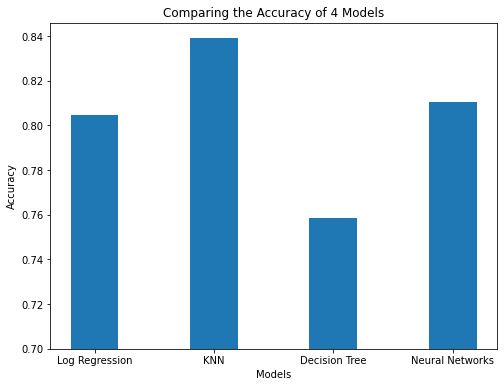

In [ ]:
# visualisation of the models by their accuracy
plt.figure(figsize=(8,6))
plt.bar(['Log Regression', 'KNN','Decision Tree', 'Neural Networks'], [accuracy_log-0.7, accuracy_knn-0.7, accuracy_dtree-0.7, accuracy_nn-0.7], width = 0.4, bottom = 0.7)
plt.title('Comparing the Accuracy of 4 Models')
plt.xlabel('Models')
plt.ylabel("Accuracy")
plt.show()